In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [4]:
def calc_julia(c, z_max=4.0, n_max=1000):
    resolution = 720

    rl = np.outer(np.linspace(-2, 2, resolution), np.ones((1280,)))
    im = np.outer(1j*np.linspace(3.6, -3.6, 1280), np.ones((resolution,)))
    x =  rl.T + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]))

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            z = x[row, col]
            k = 0
            while z.real * z.real + z.imag * z.imag < (z_max * z_max) and k < n_max:
                z = z ** 2 + c
                k += 1
                
            y[row, col] = k

    return y

time: 72.79553270339966


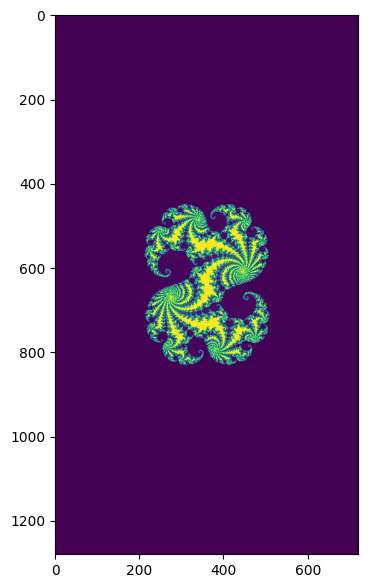

In [5]:
t1 = time.time()
jl = calc_julia(0.279155 + 0.01j)
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(jl)
plt.show()

In [4]:
def calc_julia2(resolution, c, bound=2.8, z_max=4.0, n_max=1000):

    step = 2.0 * bound / resolution
    counts = np.zeros((resolution+1, resolution+1), dtype=np.int32)

    for i in range(resolution + 1):
        real = -bound + i * step
        for j in range(resolution + 1):
            imag = -bound + j * step
            z = real + imag * 1j
            k = 0

            while (z.real * z.real + z.imag * z.imag) < (z_max * z_max) and k < n_max:
                z = z * z + c
                k += 1
            counts[i,j] = k

    return np.asarray(counts)

time: 0.20599770545959473


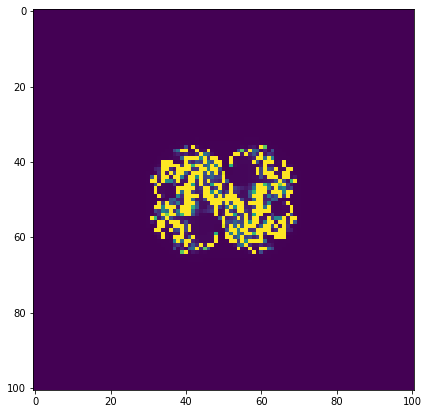

In [5]:
t1 = time.time()
jl = calc_julia2(100, (0.279155 + 0.01j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(jl)
plt.show()

time: 0.03501319885253906


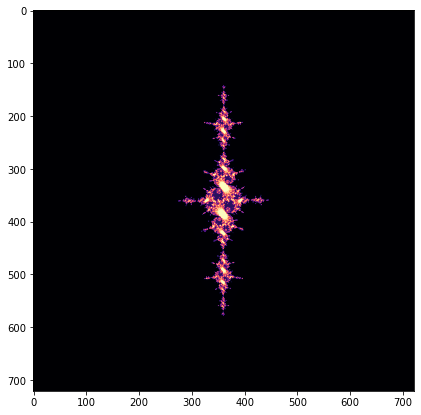

In [6]:
import julia

t1 = time.time()
jl = julia.calc_julia(720, (-1.25 + 0.01j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow((jl), cmap='magma')
plt.show()

In [7]:
def plot1(i, real):
    jl = julia.calc_julia(1440, (real + 0.01j))

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 20)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
    ax.imshow((jl), cmap='magma')

    plt.savefig('C:\\Users\\ksn\\temp/{:04d}.png'.format(i))
    plt.clf()


In [8]:
counter = 0
ii = 0
real = 0.279155

for i in range(1, 23000000):
    real += 0.0000005
    if np.log10(i) - counter < 2.5:
        counter = 0
        plot1(ii, real)
        ii += 1
    else:
        counter += 1/((i - ii)**(0.6))